In [38]:
import os
import re
import numpy as np

# Define the base directory where the expansible log directories are located
for method in ["retrain_st_pems", "pretrain_st_pems", "oneline_st_an_pems", "oneline_st_nn_pems", "trafficstream", "stkec", "eac"]:  # 
    print(" " * 50 + "*" * 10 + method +"*" * 10)
    # method = "stkec"  # expansible / retrained / fullretrained / static / trafficStream / stkec
    base_dir = f"./log/PEMS/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(\d+|Avg)\s+(MAE|RMSE|MAPE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "3": {"MAE": [], "RMSE": [], "MAPE": []},
        "6": {"MAE": [], "RMSE": [], "MAPE": []},
        "12": {"MAE": [], "RMSE": [], "MAPE": []},
        "Avg": {"MAE": [], "RMSE": [], "MAPE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            if method == 'pretrain_st_pems':
                lines = file.readlines()[-15:]
            else:
                lines = file.readlines()[-22:]
            for line in lines:
                match = metric_pattern.search(line)
                
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    last_value = values_list[-1]  # Extract the last value
                    if key in metrics:
                        metrics[key][metric_type].append(last_value)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)


    # Function to compute mean and variance for the metrics
    def compute_statistics(metric_data):
        metric_array = np.array(metric_data)
        mean = np.mean(metric_array)
        variance = np.std(metric_array)
        return mean, variance

    formatted_results = []

    for key in metrics:
        for metric_type in ["MAE", "RMSE", "MAPE"]:
            mean, variance = compute_statistics(metrics[key][metric_type])
            formatted_results.append(f"{mean:.2f}±{variance:.2f}\t")

    # Compute mean for total times
    time_mean, time_variance = compute_statistics(total_times)

    # Output the formatted results
    header = " "*22 + "3" + " " * 48 + "6" + " " * 46 + "12" + " " * 46 + "Avg" + " " * 27 + "Total Time"
    sub_header = "    {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}".format(
        "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE"
    )
    values_row = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}  {:.2f}±{:.2f}".format(*formatted_results, time_mean,time_variance)

    print(header)
    print(sub_header)
    print(values_row)
    print('\n')

                                                  **********retrain_st_pems**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      
12.96±0.14	 20.88±0.17	 18.51±0.61	 14.06±0.10	 22.96±0.15	 19.98±0.43	 16.36±0.11	 26.95±0.19	 23.31±0.24	 14.24±0.12	 23.20±0.16	 20.30±0.44	  511.44±27.69


                                                  **********pretrain_st_pems**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       

In [4]:
import os
import re
import numpy as np

# Define the base directory where the expansible log directories are located
for method in ["retrain_st_pems-few", "pretrain_st_pems-few", "oneline_st_an_pems-few", "oneline_st_nn_pems-few", "trafficstream", "stkec", "eac"]:  # 
    print(" " * 50 + "*" * 10 + method +"*" * 10)
    # method = "stkec"  # expansible / retrained / fullretrained / static / trafficStream / stkec
    base_dir = f"./log/PEMS-Few/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(\d+|Avg)\s+(MAE|RMSE|MAPE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "3": {"MAE": [], "RMSE": [], "MAPE": []},
        "6": {"MAE": [], "RMSE": [], "MAPE": []},
        "12": {"MAE": [], "RMSE": [], "MAPE": []},
        "Avg": {"MAE": [], "RMSE": [], "MAPE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            if method == 'pretrain_st_pems':
                lines = file.readlines()[-15:]
            else:
                lines = file.readlines()[-22:]
            for line in lines:
                match = metric_pattern.search(line)
                
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    last_value = values_list[-1]  # Extract the last value
                    if key in metrics:
                        metrics[key][metric_type].append(last_value)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)


    # Function to compute mean and variance for the metrics
    def compute_statistics(metric_data):
        metric_array = np.array(metric_data)
        mean = np.mean(metric_array)
        variance = np.std(metric_array)
        return mean, variance

    formatted_results = []

    for key in metrics:
        for metric_type in ["MAE", "RMSE", "MAPE"]:
            mean, variance = compute_statistics(metrics[key][metric_type])
            formatted_results.append(f"{mean:.2f}±{variance:.2f}\t")

    # Compute mean for total times
    time_mean, time_variance = compute_statistics(total_times)

    # Output the formatted results
    header = " "*22 + "3" + " " * 48 + "6" + " " * 46 + "12" + " " * 46 + "Avg" + " " * 27 + "Total Time"
    sub_header = "    {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}".format(
        "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE"
    )
    values_row = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}  {:.2f}±{:.2f}".format(*formatted_results, time_mean,time_variance)

    print(header)
    print(sub_header)
    print(values_row)
    print('\n')

                                                  **********retrain_st_pems-few**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      
13.50±0.10	 21.54±0.13	 21.02±1.08	 14.50±0.08	 23.50±0.10	 22.26±1.15	 16.81±0.11	 27.64±0.15	 25.12±1.40	 14.72±0.09	 23.83±0.11	 22.54±1.18	  982.32±328.55


                                                  **********pretrain_st_pems-few**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     M

In [1]:
import os
import re
import numpy as np

twelve_mean_mape, twelve_std_mape = [], []
avg_mean_mape, avg_std_mape = [], []

# Define the base directory where the expansible log directories are located
for method in ["retrain_st_pems-few", "pretrain_st_pems-few", "oneline_st_an_pems-few", "oneline_st_nn_pems-few", "trafficstream", "stkec", "eac"]:  # 
    # method = "stkec"  # expansible / retrained / fullretrained / static / trafficStream / stkec
    base_dir = f"./log/PEMS-Few/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(12+|Avg)\s+(RMSE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "12": {"RMSE": []},
        "Avg": {"RMSE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            if method == 'pretrain_st_pems-few':
                lines = file.readlines()[-15:]
            else:
                lines = file.readlines()[-22:]
            for line in lines:
                match = metric_pattern.search(line)
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    new_values_list = values_list[:-1]
                    if key in metrics:
                        metrics[key][metric_type].append(new_values_list)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)
    
    twelve_vector = metrics['12']['RMSE']
    twelve_mean_mape.append(np.mean(twelve_vector, axis=0))
    twelve_std_mape.append(np.std(twelve_vector, axis=0))
    
    avg_vector = metrics['Avg']['RMSE']
    avg_mean_mape.append(np.mean(avg_vector, axis=0))
    avg_std_mape.append(np.std(avg_vector, axis=0))

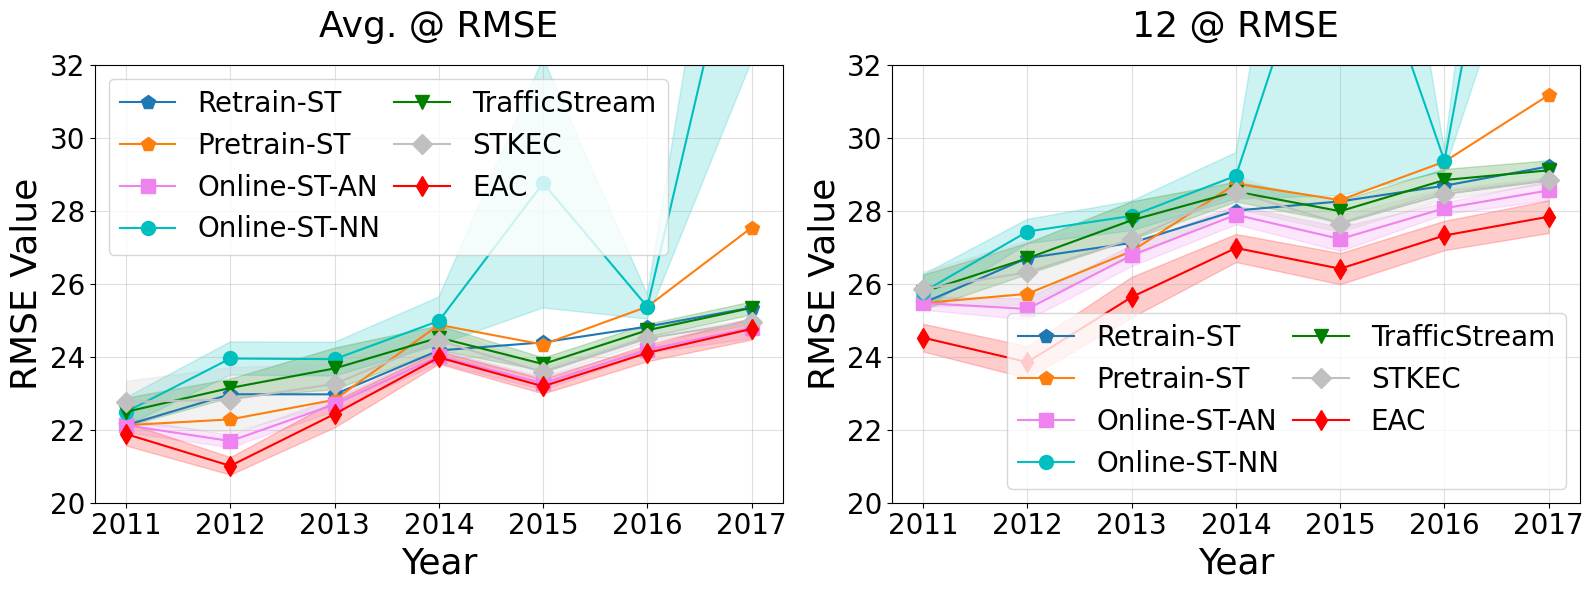

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"


years = np.arange(2011, 2018)
methods = ['Retrain-ST', 'Pretrain-ST', 'Online-ST-AN', 'Online-ST-NN', 'TrafficStream', 'STKEC', 'EAC']


mean_mape1 = np.array(avg_mean_mape)
std_mape1 = np.array(avg_std_mape)


mean_mape2 = np.array(twelve_mean_mape)
std_mape2 = np.array(twelve_std_mape)


fig, axs = plt.subplots(1, 2, figsize=(16, 6))


for i, method in enumerate(methods):
    if i == 3:
        axs[0].plot(years, mean_mape1[i], marker='o', label=method, markersize=10, color='c')
        axs[0].fill_between(years, mean_mape1[i] - std_mape1[i] / 1, mean_mape1[i] + std_mape1[i] / 1, alpha=0.2, color='c')
    elif i == 2:
        axs[0].plot(years, mean_mape1[i], marker='s', label=method, markersize=10, color='violet')
        axs[0].fill_between(years, mean_mape1[i] - std_mape1[i] / 1, mean_mape1[i] + std_mape1[i] / 1, alpha=0.2, color='violet')
    elif i == 6:
        axs[0].plot(years, mean_mape1[i], marker='d', label=method, markersize=10, color='red')
        axs[0].fill_between(years, mean_mape1[i] - std_mape1[i] / 1, mean_mape1[i] + std_mape1[i] / 1, alpha=0.2, color='red')
    elif i == 4:
        axs[0].plot(years, mean_mape1[i], marker='v', label=method, markersize=10, color='green')
        axs[0].fill_between(years, mean_mape1[i] - std_mape1[i] / 1, mean_mape1[i] + std_mape1[i] / 1, alpha=0.2, color='green')
    elif i == 5:
        axs[0].plot(years, mean_mape1[i], marker='D', label=method, markersize=10, color='silver')
        axs[0].fill_between(years, mean_mape1[i] - std_mape1[i] / 1, mean_mape1[i] + std_mape1[i] / 1, alpha=0.2, color='silver')
    else:
        axs[0].plot(years, mean_mape1[i], marker='p', label=method, markersize=10)

axs[0].set_title('Avg. @ RMSE', fontsize=26, pad=20)
axs[0].set_xlabel('Year', fontsize=26)
axs[0].set_ylabel('RMSE Value', fontsize=26)
axs[0].set_ylim(20, 32)
axs[0].legend(ncol=2, columnspacing=0.5, loc='upper left', fontsize=20)
axs[0].grid(True, alpha=0.4)
axs[0].tick_params(axis='both', labelsize=20)


for i, method in enumerate(methods):
    if i == 3:
        axs[1].plot(years, mean_mape2[i], marker='o', label=method, markersize=10, color='c')
        axs[1].fill_between(years, mean_mape2[i] - std_mape2[i] / 1, mean_mape2[i] + std_mape2[i] / 1, alpha=0.2, color='c')
    elif i == 2:
        axs[1].plot(years, mean_mape2[i], marker='s', label=method, markersize=10, color='violet')
        axs[1].fill_between(years, mean_mape2[i] - std_mape2[i] / 1, mean_mape2[i] + std_mape2[i] / 1, alpha=0.2, color='violet')
    elif i == 6:
        axs[1].plot(years, mean_mape2[i], marker='d', label=method, markersize=10, color='red')
        axs[1].fill_between(years, mean_mape2[i] - std_mape2[i] / 1, mean_mape2[i] + std_mape2[i] / 1, alpha=0.2, color='red')
    elif i == 4:
        axs[1].plot(years, mean_mape2[i], marker='v', label=method, markersize=10, color='green')
        axs[1].fill_between(years, mean_mape2[i] - std_mape2[i] / 1, mean_mape2[i] + std_mape2[i] / 1, alpha=0.2, color='green')
    elif i == 5:
        axs[1].plot(years, mean_mape2[i], marker='D', label=method, markersize=10, color='silver')
        axs[1].fill_between(years, mean_mape2[i] - std_mape2[i] / 1, mean_mape2[i] + std_mape2[i] / 1, alpha=0.2, color='silver')
    else:
        axs[1].plot(years, mean_mape2[i], marker='p', label=method, markersize=10)

axs[1].set_title('12 @ RMSE', fontsize=26, pad=20)
axs[1].set_xlabel('Year', fontsize=26)
axs[1].set_ylabel('RMSE Value', fontsize=26)
axs[1].set_ylim(20, 32)
axs[1].legend(ncol=2, columnspacing=0.5, loc='lower right', fontsize=20)
axs[1].grid(True, alpha=0.4)
axs[1].tick_params(axis='both', labelsize=20)



plt.tight_layout()
plt.savefig('few_shot.pdf', dpi=600, bbox_inches='tight')
plt.show()


In [28]:
import os
import re
import numpy as np

# Define the base directory where the expansible log directories are located
for method in ["retrain_st_air", "pretrain_st_air", "oneline_st_an_air", "oneline_st_nn_air", "trafficstream", "stkec", "eac"]:
    print(" " * 50 + "*" * 10 + method +"*" * 10)
    # method = "stkec"  # expansible / retrained / fullretrained / static / trafficStream / stkec
    base_dir = f"./log/AIR/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(\d+|Avg)\s+(MAE|RMSE|MAPE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "3": {"MAE": [], "RMSE": [], "MAPE": []},
        "6": {"MAE": [], "RMSE": [], "MAPE": []},
        "12": {"MAE": [], "RMSE": [], "MAPE": []},
        "Avg": {"MAE": [], "RMSE": [], "MAPE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            if method == 'pretrain_st_air':
                lines = file.readlines()[-15:]
            else:
                lines = file.readlines()[-19:]
            for line in lines:
                match = metric_pattern.search(line)
                
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    last_value = values_list[-1]  # Extract the last value
                    if key in metrics:
                        metrics[key][metric_type].append(last_value)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)


    # Function to compute mean and variance for the metrics
    def compute_statistics(metric_data):
        metric_array = np.array(metric_data)
        mean = np.mean(metric_array)
        variance = np.std(metric_array)
        return mean, variance

    formatted_results = []

    for key in metrics:
        for metric_type in ["MAE", "RMSE", "MAPE"]:
            mean, variance = compute_statistics(metrics[key][metric_type])
            formatted_results.append(f"{mean:.2f}±{variance:.2f}\t")

    # Compute mean for total times
    time_mean, time_variance = compute_statistics(total_times)

    # Output the formatted results
    header = " "*22 + "3" + " " * 48 + "6" + " " * 46 + "12" + " " * 46 + "Avg" + " " * 27 + "Total Time"
    sub_header = "    {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}".format(
        "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE"
    )
    values_row = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}  {:.2f}±{:.2f}".format(*formatted_results, time_mean,time_variance)

    print(header)
    print(sub_header)
    print(values_row)
    print('\n')

                                                  **********retrain_st_air**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      
18.59±0.39	 29.20±0.70	 23.72±0.88	 21.53±0.29	 34.31±0.59	 27.67±0.68	 24.83±0.26	 39.61±0.57	 32.50±0.46	 21.33±0.29	 33.77±0.62	 27.54±0.66	  205.05±32.16


                                                  **********pretrain_st_air**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	 

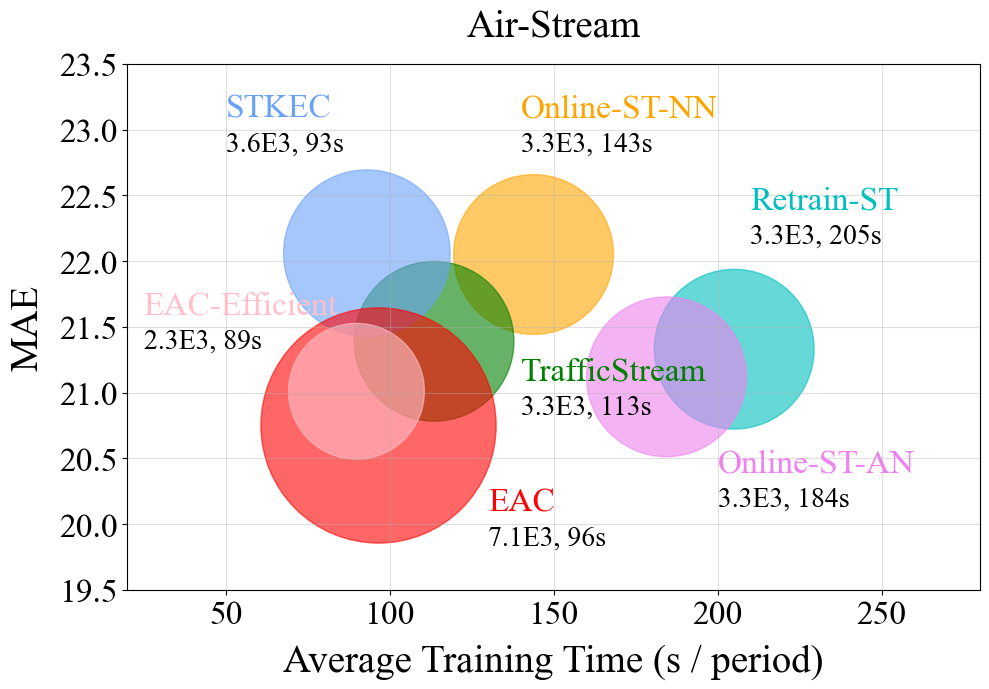

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["font.family"] = "Times New Roman"

# Data points
training_time = [205.05, 184.38, 143.86, 113.53, 93.03, 96.59, 89.87]  # x-axis: training time (ms/iter)
mse = [21.33, 21.12, 22.05, 21.39, 22.06, 20.75, 21.01]        # y-axis: MSE
memory_usage = [3308, 3308, 3308, 3308, 3596, 7170, 2390]  # Memory footprint (GB), bubble size
memory_usage_size = ['3.3E3, 205s', '3.3E3, 184s', '3.3E3, 143s', '3.3E3, 113s', '3.6E3, 93s', '7.1E3, 96s', '2.3E3, 89s']  # Memory footprint (GB), bubble size

scale = 4

# Bubble sizes - proportional to memory usage (scaled for visibility)
bubble_size = [size * scale for size in memory_usage]

# Labels for each point
labels = ['Retrain-ST', 'Online-ST-AN', 'Online-ST-NN', 'TrafficStream', 'STKEC', 'EAC', 'EAC-Efficient']

# Color for each point
colors = ['c', 'violet', 'orange', 'green', '#6ba2f9', 'red', 'pink']

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(training_time, mse, s=bubble_size, alpha=0.6, c=colors)


plt.text(210, 22.4, labels[0], fontsize=24, color=colors[0])
plt.text(210, 22.14, memory_usage_size[0], fontsize=20, color='black')

plt.text(200, 20.4, labels[1], fontsize=24, color=colors[1])
plt.text(200, 20.14, memory_usage_size[1], fontsize=20, color='black')

plt.text(140, 23.1, labels[2], fontsize=24, color=colors[2])
plt.text(140, 22.84, memory_usage_size[2], fontsize=20, color='black')


plt.text(140, 21.1, labels[3], fontsize=24, color=colors[3])
plt.text(140, 20.84, memory_usage_size[3], fontsize=20, color='black')


plt.text(50, 23.1, labels[4], fontsize=24, color=colors[4])
plt.text(50, 22.84, memory_usage_size[4], fontsize=20, color='black')


plt.text(130, 20.1, labels[5], fontsize=24, color=colors[5])
plt.text(130, 19.84, memory_usage_size[5], fontsize=20, color='black')


plt.text(25, 21.6, labels[6], fontsize=24, color=colors[6])
plt.text(25, 21.34, memory_usage_size[6], fontsize=20, color='black')




# Add grid, labels, title
plt.grid(True, alpha=0.4)
plt.xlabel('Average Training Time (s / period)', fontsize=28, labelpad=10)
plt.ylabel('MAE', fontsize=28, labelpad=10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(20, 280)
plt.ylim(19.5, 23.5)
plt.title('Air-Stream', fontsize=28, pad=20)

# plt.show()

plt.tight_layout()
plt.savefig('air_mae_time_memory.pdf', dpi=600, bbox_inches='tight')
plt.show()

In [57]:
import os
import re
import numpy as np

# Define the base directory where the expansible log directories are located
for method in ["retrain_st_energy-wind", "pretrain_st_energy-wind", "oneline_st_an_energy-wind", "oneline_st_nn_energy-wind", "trafficstream", "stkec", "eac"]:  #   
    print(" " * 50 + "*" * 10 + method +"*" * 10)
    # method = "stkec"  # expansible / retrained / fullretrained / static / trafficStream / stkec
    base_dir = f"./log/ENERGY-Wind/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(\d+|Avg)\s+(MAE|RMSE|MAPE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "3": {"MAE": [], "RMSE": [], "MAPE": []},
        "6": {"MAE": [], "RMSE": [], "MAPE": []},
        "12": {"MAE": [], "RMSE": [], "MAPE": []},
        "Avg": {"MAE": [], "RMSE": [], "MAPE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            if method == 'pretrain_st_engery-wind':
                lines = file.readlines()[-15:]
            else:
                lines = file.readlines()[-19:]
            for line in lines:
                match = metric_pattern.search(line)
                
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    last_value = values_list[-1]  # Extract the last value
                    if key in metrics:
                        metrics[key][metric_type].append(last_value)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)


    # Function to compute mean and variance for the metrics
    def compute_statistics(metric_data):
        metric_array = np.array(metric_data)
        mean = np.mean(metric_array)
        variance = np.std(metric_array)
        return mean, variance

    formatted_results = []

    for key in metrics:
        for metric_type in ["MAE", "RMSE", "MAPE"]:
            mean, variance = compute_statistics(metrics[key][metric_type])
            formatted_results.append(f"{mean:.2f}±{variance:.2f}\t")

    # Compute mean for total times
    time_mean, time_variance = compute_statistics(total_times)

    # Output the formatted results
    header = " "*22 + "3" + " " * 48 + "6" + " " * 46 + "12" + " " * 46 + "Avg" + " " * 27 + "Total Time"
    sub_header = "    {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}".format(
        "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE"
    )
    values_row = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}  {:.2f}±{:.2f}".format(*formatted_results, time_mean,time_variance)

    print(header)
    print(sub_header)
    print(values_row)
    print('\n')

                                                  **********retrain_st_energy-wind**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      
5.56±0.14	 5.75±0.12	 54.35±2.11	 5.46±0.12	 5.70±0.11	 54.61±2.08	 5.45±0.09	 5.80±0.09	 55.60±1.55	 5.48±0.12	 5.72±0.11	 54.74±2.06	  58.54±7.32


                                                  **********pretrain_st_energy-wind**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE   

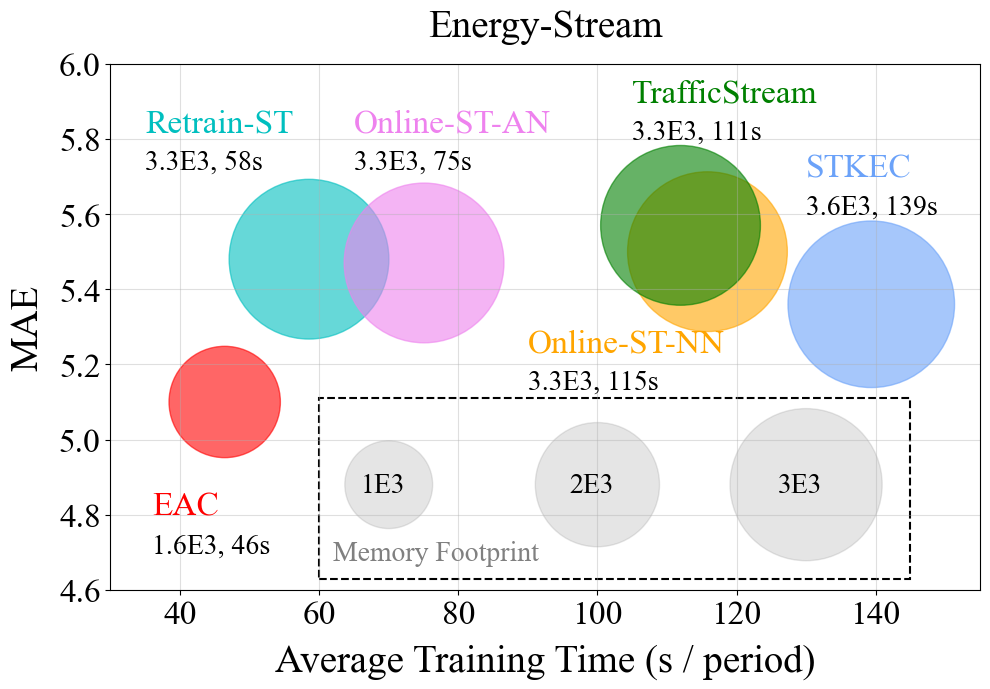

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams["font.family"] = "Times New Roman"

# Data points
training_time = [58.54, 75.08, 115.82, 111.95, 139.37, 46.42]  # x-axis: training time (ms/iter)
mse = [5.48, 5.47, 5.50, 5.57, 5.36, 5.10]        # y-axis: MSE
memory_usage = [3308, 3308, 3308, 3308, 3596, 1607]  # Memory footprint (GB), bubble size
memory_usage_size = ['3.3E3, 58s', '3.3E3, 75s', '3.3E3, 115s', '3.3E3, 111s', '3.6E3, 139s', '1.6E3, 46s']  # Memory footprint (GB), bubble size

scale = 4

# Bubble sizes - proportional to memory usage (scaled for visibility)
bubble_size = [size * scale for size in memory_usage]

# Labels for each point
labels = ['Retrain-ST', 'Online-ST-AN', 'Online-ST-NN', 'TrafficStream', 'STKEC', 'EAC']

# Color for each point
colors = ['c', 'violet', 'orange', 'green', '#6ba2f9', 'red']

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(training_time, mse, s=bubble_size, alpha=0.6, c=colors)

# Add labels to each bubble
# for i, label in enumerate(labels):
#     plt.text(training_time[i], mse[i], label, fontsize=20, ha='center')

plt.text(35, 5.82, labels[0], fontsize=24, color=colors[0])
plt.text(35, 5.72, memory_usage_size[0], fontsize=20, color='black')

plt.text(65, 5.82, labels[1], fontsize=24, color=colors[1])
plt.text(65, 5.72, memory_usage_size[1], fontsize=20, color='black')

plt.text(90, 5.235, labels[2], fontsize=24, color=colors[2])
plt.text(90, 5.135, memory_usage_size[2], fontsize=20, color='black')


plt.text(105, 5.9, labels[3], fontsize=24, color=colors[3])
plt.text(105, 5.8, memory_usage_size[3], fontsize=20, color='black')


plt.text(130, 5.7, labels[4], fontsize=24, color=colors[4])
plt.text(130, 5.6, memory_usage_size[4], fontsize=20, color='black')


plt.text(36, 4.8, labels[5], fontsize=24, color=colors[5])
plt.text(36, 4.7, memory_usage_size[5], fontsize=20, color='black')


plt.scatter([70, 100, 130], [4.88, 4.88, 4.88], s=[1000*scale, 2000*scale, 3000*scale], alpha=0.2, c='grey')
plt.text(66, 4.86, '1E3', fontsize=20)
plt.text(96, 4.86, '2E3', fontsize=20)
plt.text(126, 4.86, '3E3', fontsize=20)
plt.text(62, 4.68, 'Memory Footprint', fontsize=20, ha='left', color='grey')
rect = patches.Rectangle((60, 4.63), 85, 0.48, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
plt.gca().add_patch(rect)


# Add grid, labels, title
plt.grid(True, alpha=0.4)
plt.xlabel('Average Training Time (s / period)', fontsize=28, labelpad=10)
plt.ylabel('MAE', fontsize=28, labelpad=10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(30, 155)
plt.ylim(4.6, 6)
plt.title('Energy-Stream', fontsize=28, pad=20)

# plt.show()

plt.tight_layout()
plt.savefig('energy_mae_time_memory.pdf', dpi=600, bbox_inches='tight')
plt.show()

In [32]:
methods = [
[5.56, 5.46, 5.45, 5.48, 12.96, 14.06, 16.36, 14.24, 18.59, 21.53, 24.83, 21.33],
[10.65, 10.66, 17.10, 17.05, 14.13, 15.17, 17.35, 15.33 , 19.58, 22.72, 26.00, 22.44],
[5.47, 5.46, 5.47, 5.47, 12.80, 13.92, 16.17, 14.08, 18.30, 21.31, 24.70, 21.12],
[5.51, 5.50, 5.49, 5.50, 14.68, 16.57, 20.64, 16.95, 19.38, 22.24, 25.50, 22.05],
[5.58, 5.57, 5.58, 5.57, 12.89, 14.03, 16.39, 14.22, 18.66, 21.59, 24.90, 21.39],
[5.31, 5.34, 5.41, 5.36, 12.85, 13.98, 16.25, 14.14, 19.42, 22.24, 25.44, 22.06]
]

second = [5.31, 5.34, 5.41, 5.36, 12.80, 13.92, 16.17, 14.08, 18.30, 21.31, 24.70, 21.12]

our = [5.08, 5.09, 5.15, 5.10, 12.65, 13.45, 14.92, 13.53, 18.11, 20.87, 24.15, 20.75]

In [29]:
for idx in range(12):
    print((second[idx] - our[idx])/ second[idx])

0.0433145009416195
0.04681647940074907
0.04805914972273563
0.04850746268656729
0.011718750000000028
0.033764367816092
0.07730364873222026
0.03906250000000005
0.010382513661202256
0.020647583294227955
0.022267206477732823
0.01751893939393944


In [33]:
for method in methods:
    print('*'*20)
    for idx in range(12):
        print((method[idx] - second[idx])/ second[idx])

********************
0.04708097928436912
0.02247191011235957
0.0073937153419593405
0.022388059701492557
0.012500000000000011
0.010057471264367858
0.011750154607297322
0.011363636363636374
0.01584699453551908
0.010323791647114146
0.005263157894736802
0.00994318181818169
********************
1.0056497175141246
0.9962546816479402
2.1608133086876156
2.1809701492537314
0.10390625
0.08979885057471264
0.07297464440321581
0.08877840909090909
0.06994535519125669
0.0661661191928672
0.05263157894736845
0.06250000000000001
********************
0.030131826741996263
0.02247191011235957
0.011090573012938929
0.020522388059701385
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
********************
0.03766478342749533
0.02996254681647943
0.014787430683918681
0.026119402985074567
0.14687499999999992
0.19037356321839083
0.2764378478664192
0.2038352272727272
0.059016393442622855
0.04364148287189112
0.032388663967611364
0.04403409090909089
********************
0.05084745762711874
0.04307116104868922
0.03142329020332716
0.0

In [4]:
second = [14.07, 22.93, 13.23, 21.36, 14.69, 23.33, 14.01, 22.76, 13.73, 21.87, 14.64, 23.12]

our = [13.72, 22.14, 12.83, 20.59, 14.64, 22.79, 13.62, 21.80, 13.09, 20.80, 13.69, 21.65]

for idx in range(12):
    print((second[idx] - our[idx])/ second[idx])

0.024875621890547237
0.03445268207588308
0.030234315948601688
0.03604868913857676
0.003403675970047579
0.023146163737676775
0.02783725910064244
0.042179261862917435
0.04661325564457396
0.04892546867855511
0.06489071038251373
0.06358131487889283


In [1]:
import os
import re
import numpy as np

# Define the base directory where the expansible log directories are located
for method in ["eac_pems_sp_attn", "non_eac_pems_sp_attn", "eac_pems_sp_conv", "non_eac_pems_sp_conv", "eac_pems_sp_rec", "non_eac_pems_sp_rec", "eac_pems_st_attn", "non_eac_pems_st_attn", "eac_pems_st_conv", "non_eac_pems_st_conv", "eac_pems_st_rec", "non_eac_pems_st_rec"]:  # 
    print(" " * 50 + "*" * 10 + method +"*" * 10)
    base_dir = f"./log/PEMS-Universal/{method}"

    # Define the directories to parse
    directories = [f"{base_dir}-42", f"{base_dir}-43", f"{base_dir}-44", f"{base_dir}-45", f"{base_dir}-46"]

    # Define a regular expression to extract the metric values
    metric_pattern = re.compile(r"(\d+|Avg)\s+(MAE|RMSE|MAPE)\s+([\d\.\s]+)")
    total_time_pattern = re.compile(r"total time:\s+([\d\.]+)")

    # Initialize a dictionary to store metrics
    metrics = {
        "3": {"MAE": [], "RMSE": [], "MAPE": []},
        "6": {"MAE": [], "RMSE": [], "MAPE": []},
        "12": {"MAE": [], "RMSE": [], "MAPE": []},
        "Avg": {"MAE": [], "RMSE": [], "MAPE": []}
    }

    # List to store total times
    total_times = []

    # Function to parse the log file and extract the last column value of metric lines
    def parse_log_file(file_path):
        with open(file_path, "r") as file:
            lines = file.readlines()[-22:]
            for line in lines:
                match = metric_pattern.search(line)
                
                total_time_match = total_time_pattern.search(line)
                if match:
                    key, metric_type, values = match.groups()
                    values_list = list(map(float, values.split()))
                    last_value = values_list[-1]  # Extract the last value
                    if key in metrics:
                        metrics[key][metric_type].append(last_value)
                if total_time_match:
                    total_time = float(total_time_match.group(1))
                    total_times.append(total_time)


    # Process each directory and extract metrics
    for directory in directories:
        log_file_path = os.path.join(directory, f"{method}.log")
        if os.path.exists(log_file_path):
            parse_log_file(log_file_path)


    # Function to compute mean and variance for the metrics
    def compute_statistics(metric_data):
        metric_array = np.array(metric_data)
        mean = np.mean(metric_array)
        variance = np.std(metric_array)
        return mean, variance

    formatted_results = []

    for key in metrics:
        for metric_type in ["MAE", "RMSE", "MAPE"]:
            mean, variance = compute_statistics(metrics[key][metric_type])
            formatted_results.append(f"{mean:.2f}±{variance:.2f}\t")

    # Compute mean for total times
    time_mean, time_variance = compute_statistics(total_times)

    # Output the formatted results
    header = " "*22 + "3" + " " * 48 + "6" + " " * 46 + "12" + " " * 46 + "Avg" + " " * 27 + "Total Time"
    sub_header = "    {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}\t     {:<10}".format(
        "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE", "MAE", "RMSE", "MAPE"
    )
    values_row = "{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}  {:.2f}±{:.2f}".format(*formatted_results, time_mean,time_variance)

    print(header)
    print(sub_header)
    print(values_row)
    print('\n')


                                                  **********eac_pems_sp_attn**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      	     MAE       	     RMSE      	     MAPE      
13.10±0.08	 20.60±0.09	 19.23±0.38	 13.57±0.08	 21.50±0.09	 19.73±0.33	 14.71±0.09	 23.42±0.11	 21.12±0.33	 13.69±0.08	 21.65±0.10	 19.86±0.33	  621.60±33.81


                                                  **********non_eac_pems_sp_attn**********
                      3                                                6                                              12                                              Avg                           Total Time
    MAE       	     RMSE      	     MAPE      	     MAE  

/tmp/ipykernel_1547620/3664749613.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


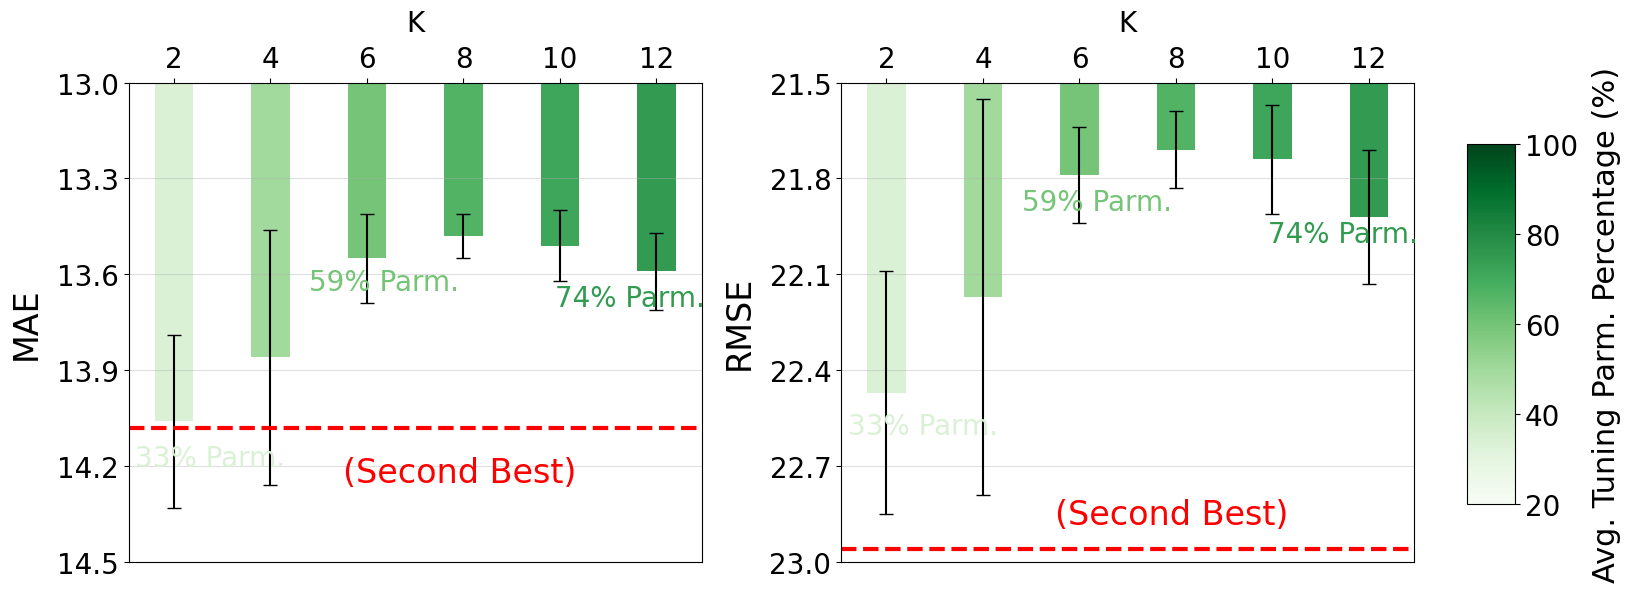

In [198]:
import matplotlib.pyplot as plt
import numpy as np

k_values = [2, 4, 6, 8, 10, 12]
mae_values = [14.06, 13.86, 13.65-0.1, 13.48, 13.51, 13.59]
errors = [0.27, 0.40, 0.14, 0.07, 0.11, 0.12]
adjustment_percentage = [33.27, 49.93, 59.94, 66.61, 71.37, 74.95]


cmap = plt.cm.Greens   
norm = plt.Normalize(20, 100)
colors = cmap(norm(adjustment_percentage))


fig, axs = plt.subplots(1, 2, figsize=(16, 6))


bars1 = axs[0].bar(k_values, mae_values, color=colors, yerr=errors, capsize=5)
axs[0].set_ylim(13, 14.5)
axs[0].set_yticks(np.arange(13, 14.6, 0.3))
axs[0].invert_yaxis()
# axs[0].set_xlabel('K', fontsize=24)
axs[0].set_ylabel('MAE', fontsize=24, labelpad=10)
axs[0].tick_params(axis='both', labelsize=20)
axs[0].grid(True, axis='y', alpha=0.4)
axs[0].axhline(y=14.08, color='red', linestyle='--', linewidth=3)


axs[0].text(5.5, 14.25, '(Second Best)', fontsize=24, ha='left', color='red')

axs[0].text(1.2, 14.2, '33% Parm.', fontsize=20, ha='left', color='#daf1d6')
axs[0].text(4.8, 13.65, '59% Parm.', fontsize=20, ha='left', color='#75c477')
axs[0].text(9.9, 13.7, '74% Parm.', fontsize=20, ha='left', color='#319b51')


k_values = [2, 4, 6, 8, 10, 12]
mae_values = [22.47, 22.17, 21.79, 21.71, 21.74, 21.92]
errors = [0.38, 0.62, 0.15, 0.12, 0.17, 0.21]
adjustment_percentage = [33.27, 49.93, 59.94, 66.61, 71.37, 74.95]



bars2 = axs[1].bar(k_values, mae_values, color=colors, yerr=errors, capsize=5)
axs[1].set_ylim(21.5, 23)
axs[1].set_yticks(np.arange(21.5, 23.1, 0.3))
axs[1].invert_yaxis()

axs[1].set_ylabel('RMSE', fontsize=24, labelpad=10)
axs[1].tick_params(axis='both', labelsize=20)
axs[1].grid(True, axis='y', alpha=0.4)
axs[1].axhline(y=22.96, color='red', linestyle='--', linewidth=3)


axs[1].text(5.5, 22.88, '(Second Best)', fontsize=24, ha='left', color='red')

axs[1].text(1.2, 22.6, '33% Parm.', fontsize=20, ha='left', color='#daf1d6')
axs[1].text(4.8, 21.9, '59% Parm.', fontsize=20, ha='left', color='#75c477')
axs[1].text(9.9, 22, '74% Parm.', fontsize=20, ha='left', color='#319b51')


for ax in axs:
    ax.set_xlabel('K', loc='center', labelpad=10, fontsize=20)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Avg. Tuning Parm. Percentage (%)', fontsize=22, labelpad=10)


plt.tight_layout(rect=[0, 0, 0.9, 1])
# plt.show()
plt.savefig('k_study.pdf', dpi=600, bbox_inches='tight')